In [1]:
from single_hidden_node import experiment as exp

import matplotlib.pyplot as plt
import numpy as np
from common import *

# Simple recurrent network, single hidden node

Here I train a RNN with a single hidden node on a scalar time-series. The model is trained to predict value $x^t$ on the basis of all previous timepoints $x^{0\dots t-1}$. The data is a simple sine wave:

In [2]:
numT = 100
numN = 5000

data = np.sin(np.arange(0, numT+1)*(2*np.pi*11)/(numT+1))
x = data[0:-1]
y = data[1:]

## Training

In [3]:
cfg0 = Cfg()
cfg0.numT = numT
cfg0.numN = numN
cfg0.alpha = 1
cfg0.v0 = np.random.randn(1)
cfg0.alpha_v = cfg0.alpha
cfg0.feedback_epoch = 250

log = exp.run(cfg0, x, y)   

Finished 0/5000
Finished 250/5000
Finished 500/5000
Finished 750/5000
Finished 1000/5000
Finished 1250/5000
Finished 1500/5000
Finished 1750/5000
Finished 2000/5000
Finished 2250/5000
Finished 2500/5000
Finished 2750/5000
Finished 3000/5000
Finished 3250/5000
Finished 3500/5000
Finished 3750/5000
Finished 4000/5000
Finished 4250/5000
Finished 4500/5000
Finished 4750/5000


## Mean squared error

Text(0, 0.5, 'Mean squared error')

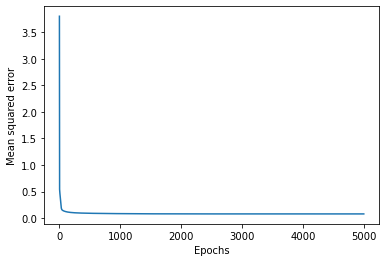

In [4]:
plt.figure()
plt.plot(log.mse)
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")

## Predicted data $\hat{y}$ and training data $x$ over time
From the final epoch

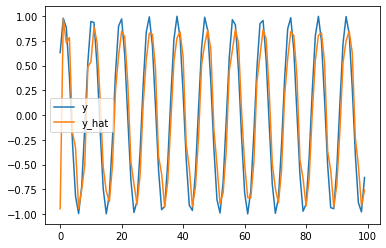

In [5]:
plt.figure()
plt.plot(y)
plt.plot(log.y_hat[cfg0.numN-1])
plt.legend(['y','y_hat'])

## Evolution of parameters

Text(0.5, 0, 'Epochs')

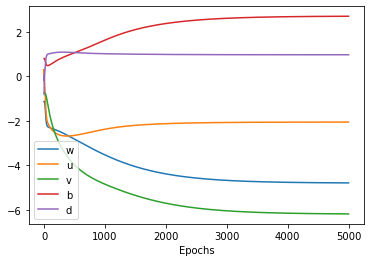

In [6]:
plt.figure()
plt.plot(log.w)
plt.plot(log.u)
plt.plot(log.v)
plt.plot(log.b)
plt.plot(log.d)
plt.legend(['w', 'u', 'v', 'b', 'd'])    
plt.xlabel("Epochs")

# Validation

To validate the training of the model, we'll also train a model in which the recurrent weights $v$ are fixed to 0.

In [8]:
cfg0 = Cfg()
cfg0.numT = numT
cfg0.numN = numN
cfg0.alpha = 1
cfg0.feedback_epoch = 250

# Parameter v is fixed to 0
cfg0.v0 = 0
cfg0.fix_v = True

log_h0 = exp.run(cfg0, x, y)

Finished 0/5000
Finished 250/5000
Finished 500/5000
Finished 750/5000
Finished 1000/5000
Finished 1250/5000
Finished 1500/5000
Finished 1750/5000
Finished 2000/5000
Finished 2250/5000
Finished 2500/5000
Finished 2750/5000
Finished 3000/5000
Finished 3250/5000
Finished 3500/5000
Finished 3750/5000
Finished 4000/5000
Finished 4250/5000
Finished 4500/5000
Finished 4750/5000


## Mean squared error

The full model with recurrent weight is better able to predict the data than the null-model without recurrent weight:

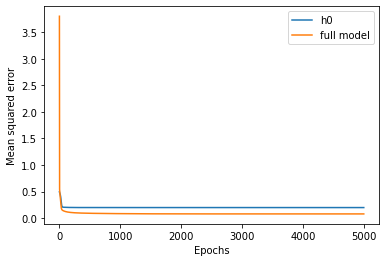

In [9]:
plt.figure()
plt.plot(log_h0.mse)
plt.plot(log.mse)
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")
plt.legend(['h0', 'full model'])

## Predicted data $\hat{y}$ and training data $x$ scatter plot

If the model's prediction is influenced by its internal state, then for a given $x$ it should be able to output more than one prediction $\hat{y}$.

This is indeed the case for full the model:

Text(0, 0.5, '$\\hat{y}$')

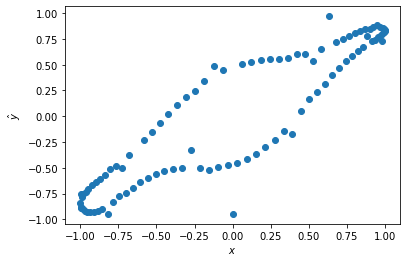

In [10]:
plt.figure()
plt.scatter(x, log.y_hat[numN-1])
plt.xlabel("$x$")
plt.ylabel("$\hat{y}$")

But not for the null model:

Text(0, 0.5, '$\\hat{y}$')

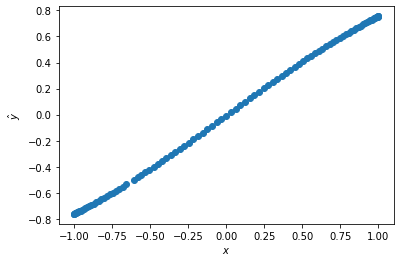

In [11]:
plt.figure()
plt.scatter(x, log_h0.y_hat[numN-1])
plt.xlabel("$x$")
plt.ylabel("$\hat{y}$")